# **Module 5 Lab Matrix Multiply**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Environment Setup:  Verify the environment

In [ ]:
!nvidia-smi
!nvcc --version

Mount Google drive.

You must change directory to the path where the code for this lab is uploaded.

In [ ]:
%cd drive/MyDrive/SP25-HPC/Mod5-Lab-Basic-Matrix-Multi/

3. Write the CUDA C Code
This cell writes a CUDA C program (blur.cu) that:

Loads the input image (forcing 1 channel for grayscale) using stb_image.
Allocates device memory.
Launches a CUDA kernel that performs a simple 3×3 blur.
Copies the result back and writes the blurred image using stb_image_write. %%writefile blur.cu


4. Compile the CUDA Program
Compile the program using nvcc (the NVIDIA CUDA compiler):

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kernel.cu to kernel (1).cu
Saving main.cu to main (1).cu
Saving support.cu to support (1).cu
Saving support.h to support (1).h


In [ ]:
!rm -rf *.o
!nvcc -arch=sm_75 -o sgemm kernel.cu support.cu main.cu

5. Run the CUDA Program
Run the executable to process the image:
You should see an output message indicating that the blurred image was saved as output.png.

In [ ]:
!./sgemm 100


Setting up the problem...0.000437 s
    A: 100 x 100
    B: 100 x 100
    C: 100 x 100
Allocating device variables...0.251480 s
Copying data from host to device...0.001771 s
Launching kernel...Execution time: 0.000144 seconds
Copying data from device to host...0.000054 s
Verifying results...TEST PASSED



In [ ]:
import subprocess
import time
import pandas as pd

# Define multiple matrix dimensions from the table
matrix_sizes = [(10, 10), (100, 100), (500, 500), (1000, 1000), (2500, 2500), (5000, 5000), (10000, 10000)]
cuda_times = [] # varibale to store exceution time for cuda

# Global matrix to store execution times
global_execution_matrix = []

# Loop through each matrix size and run ./sgemm
for m, n in matrix_sizes:
    cmd = f"./sgemm {m} {n}"  # Command to run
    try:
        start_time = time.time()
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        end_time = time.time()

        # Store execution time
        execution_time = round(end_time - start_time, 6)
        cuda_times.append(execution_time)

        print(f"Executed: {cmd} | Time: {execution_time} sec")
    except Exception as e:
        execution_time = "Error"
        cuda_times.append(execution_time)
        print(f"Error running {cmd}: {str(e)}")

    # Append execution time to the global matrix
    global_execution_matrix.append([f"{m}x{n}", execution_time])

# Create a DataFrame with results
df = pd.DataFrame(global_execution_matrix, columns=["Matrix Dimension", "CUDA Execution Time (sec)"])

# Display the results
from IPython.display import display
display(df)

Executed: ./sgemm 10 10 | Time: 0.004338 sec
Executed: ./sgemm 100 100 | Time: 0.001801 sec
Executed: ./sgemm 500 500 | Time: 0.001501 sec
Executed: ./sgemm 1000 1000 | Time: 0.001603 sec
Executed: ./sgemm 2500 2500 | Time: 0.00148 sec
Executed: ./sgemm 5000 5000 | Time: 0.001532 sec
Executed: ./sgemm 10000 10000 | Time: 0.001462 sec


,Matrix Dimension,CUDA Execution Time (sec)
0,10x10,0.004338
1,100x100,0.001801
2,500x500,0.001501
3,1000x1000,0.001603
4,2500x2500,0.001480
5,5000x5000,0.001532
6,10000x10000,0.001462


### Python : Matrix multiplication

In [ ]:
import numpy as np
import time

matrix_sizes = [(10, 10), (100, 100), (500, 500), (1000, 1000), (2500, 2500), (5000, 5000), (10000, 10000)]
numpy_times = []

# Function to perform matrix multiplication with given dimensions
def matrix_multiplication(m=100, n=100):
    # Generate random matrices A and B with values between 1 and 100
    A = np.random.randint(1, 101, (m, n))
    B = np.random.randint(1, 101, (n, m))

    # Start timing the matrix multiplication
    start_time = time.time()

    # Perform matrix multiplication
    C = np.dot(A, B)

    # End timing
    end_time = time.time()

    # Print results
    # print(f"Matrix multiplication of size {m}x{n} completed.")
    time_taken = round(end_time - start_time, 6)
    print(f"Time taken: {time_taken} seconds.")
    numpy_times.append(time_taken)

    return C

# Example usage with default size 100x100
if __name__ == "__main__":
  for m, n in matrix_sizes:
      matrix_multiplication(m,n)


Time taken: 1.6e-05 seconds.
Time taken: 0.002791 seconds.
Time taken: 0.231472 seconds.
Time taken: 1.430036 seconds.
Time taken: 35.532359 seconds.
Time taken: 296.949013 seconds.
Time taken: 4356.425496 seconds.


## Plotting the graph of CUDA and Python excecution time

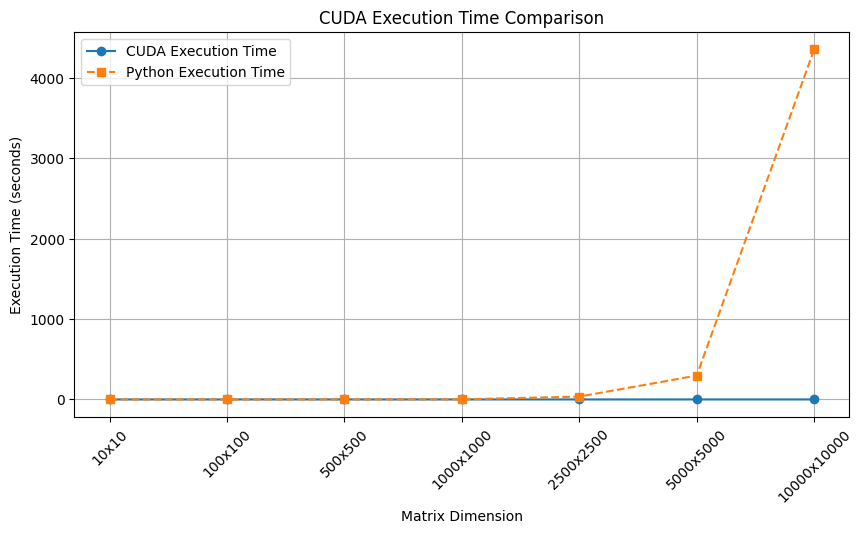

In [ ]:
import matplotlib.pyplot as plt

# Data from the two tables
matrix_dimensions = ["10x10", "100x100", "500x500", "1000x1000", "2500x2500", "5000x5000", "10000x10000"]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(matrix_dimensions, cuda_times, marker='o', linestyle='-', label="CUDA Execution Time")
plt.plot(matrix_dimensions, numpy_times, marker='s', linestyle='--', label="Python Execution Time")

# Labels and title
plt.xlabel("Matrix Dimension")
plt.ylabel("Execution Time (seconds)")
plt.title("CUDA Execution Time Comparison")
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()


## Logarithmic Scale for Better Visibility
Showing smaller values.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '10x10'),
  Text(1, 0, '100x100'),
  Text(2, 0, '500x500'),
  Text(3, 0, '1000x1000'),
  Text(4, 0, '2500x2500'),
  Text(5, 0, '5000x5000'),
  Text(6, 0, '10000x10000')])

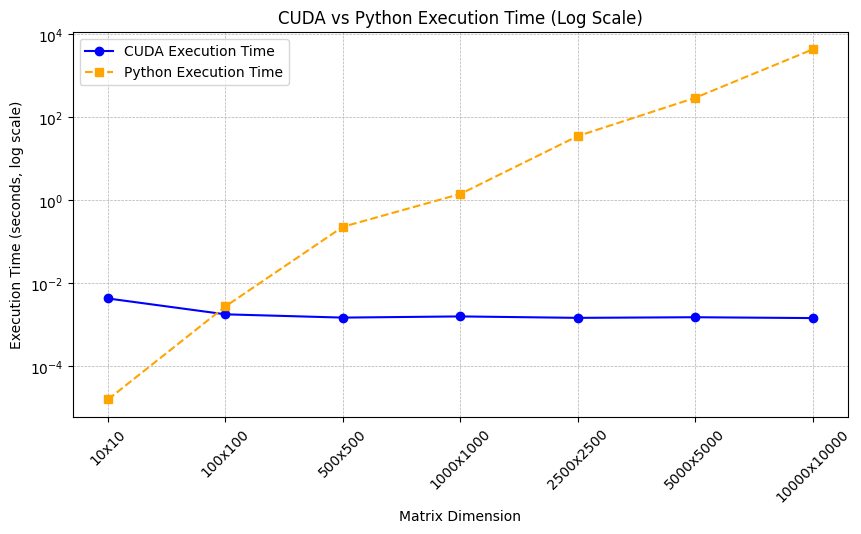

In [ ]:
import matplotlib.pyplot as plt

# Data from the execution results
matrix_dimensions = ["10x10", "100x100", "500x500", "1000x1000", "2500x2500", "5000x5000", "10000x10000"]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(matrix_dimensions, cuda_times, marker='o', linestyle='-', label="CUDA Execution Time", color='blue')
plt.plot(matrix_dimensions, numpy_times, marker='s', linestyle='--', label="Python Execution Time", color='orange')

# Apply logarithmic scale for better visibility
plt.yscale('log')

# Labels and title
plt.xlabel("Matrix Dimension")
plt.ylabel("Execution Time (seconds, log scale)")
plt.title("CUDA vs Python Execution Time (Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Rotate x labels for better visibility
plt.xticks(rotation=45)

# Show the


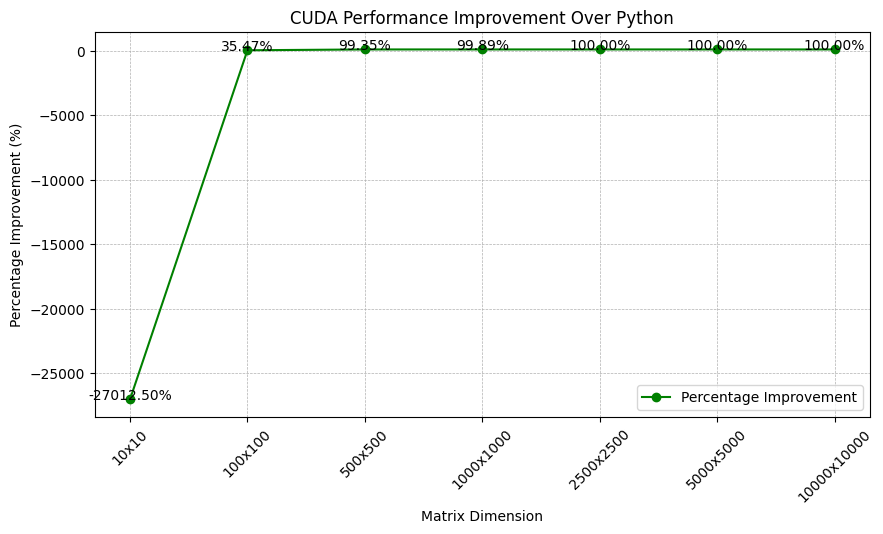

In [ ]:
import matplotlib.pyplot as plt

# Matrix dimensions
matrix_dimensions = ["10x10", "100x100", "500x500", "1000x1000", "2500x2500", "5000x5000", "10000x10000"]

# # Execution times for NumPy (Python) and CUDA
# numpy_times = [1.6e-05, 0.002791, 0.231472, 1.430036, 35.532359, 296.949013, 4356.425496]
# cuda_times = [0.004338, 0.001801, 0.001501, 0.001603, 0.00148, 0.001532, 0.001462]

# Compute percentage improvement
percentage_improvement = [( (py - cu) / py) * 100 for py, cu in zip(numpy_times, cuda_times)]

# Plot the percentage improvement
plt.figure(figsize=(10, 5))
plt.plot(matrix_dimensions, percentage_improvement, marker='o', linestyle='-', color='green', label="Percentage Improvement")

# Labels and title
plt.xlabel("Matrix Dimension")
plt.ylabel("Percentage Improvement (%)")
plt.title("CUDA Performance Improvement Over Python")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()

# Show percentage values on the plot
for i, txt in enumerate(percentage_improvement):
    plt.text(i, percentage_improvement[i] + 1, f"{txt:.2f}%", ha='center', fontsize=10)

# Rotate x labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


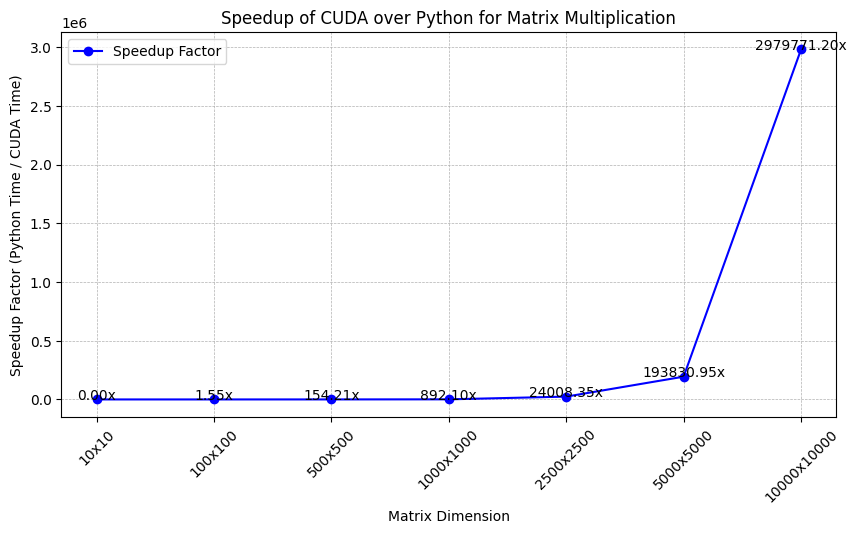

In [ ]:
import matplotlib.pyplot as plt

# Matrix dimensions
matrix_dimensions = ["10x10", "100x100", "500x500", "1000x1000", "2500x2500", "5000x5000", "10000x10000"]

# Compute speedup factor (Python Execution Time / CUDA Execution Time)
speedup_factor = [py / cu for py, cu in zip(numpy_times, cuda_times)]

# Plot the speedup factor
plt.figure(figsize=(10, 5))
plt.plot(matrix_dimensions, speedup_factor, marker='o', linestyle='-', color='blue', label="Speedup Factor")

# Labels and title
plt.xlabel("Matrix Dimension")
plt.ylabel("Speedup Factor (Python Time / CUDA Time)")
plt.title("Speedup of CUDA over Python for Matrix Multiplication")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()

# Show speedup values on the plot
for i, txt in enumerate(speedup_factor):
    plt.text(i, speedup_factor[i] + 1, f"{txt:.2f}x", ha='center', fontsize=10)

# Rotate x labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()
